In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./../../data/multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


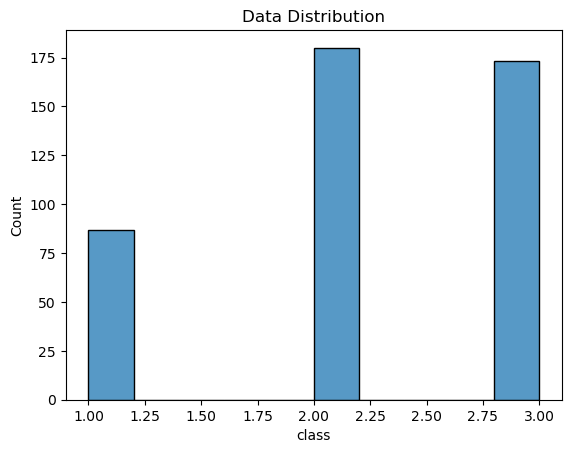

In [3]:
sns.histplot(data=df, x='class')
plt.title('Data Distribution')
plt.show()

In [4]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen']].copy()
y=df[['class']].copy()

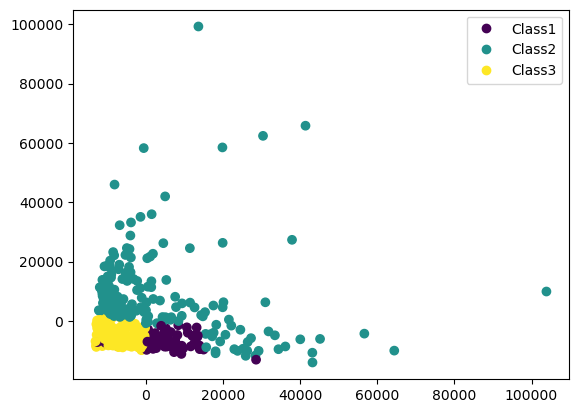

In [5]:
from sklearn.decomposition import PCA

def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

pca = PCA(n_components=2)
visualize = pca.fit_transform(X)

scatter_visualize(visualize[:, 0], visualize[:, 1], y.values[:, 0])

### KNN Scratch

In [94]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [88]:
print(X.shape)
print(X_train_val.shape, X_test.shape)
print(X_train.shape, X_val.shape)

(440, 7)
(330, 7) (110, 7)
(247, 7) (83, 7)


In [36]:
X_train.shape, y_train.shape


((247, 7), (247, 1))

In [37]:
y_train.value_counts()

class
3        99
2        95
1        53
Name: count, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)
y_train_sm.value_counts()

class
1        99
2        99
3        99
Name: count, dtype: int64

In [96]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()
X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)
y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]


In [134]:
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [135]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [136]:
distances[5]

(0.30326220630774686, 3)

In [137]:
# Nearest/First K points
distances = distances[:7]
distances

[(0.19751801303030372, 3),
 (0.20439861716015534, 3),
 (0.22957460733548185, 3),
 (0.2865919598821584, 3),
 (0.2927771415981228, 3),
 (0.30326220630774686, 3),
 (0.3234038493543888, 3)]

In [138]:
distances = np.array(distances)
distances
classes_counts = np.unique(distances[:,1],return_counts=True)
classes_counts
index = classes_counts[1].argmax()
pred = classes_counts[0][index]
print('kNN prediction:',pred)

kNN prediction: 3.0


In [120]:
distances = np.array(distances)
classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 1.0


In [121]:
index = classes_counts[0].argmax()
classes_counts[0][index]

3.0

In [139]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [140]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.19751801 3.        ]
 [0.20439862 3.        ]
 [0.22957461 3.        ]
 [0.28659196 3.        ]
 [0.29277714 3.        ]]
The predicted class label: 3


In [142]:
from sklearn.metrics import confusion_matrix
y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)

cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  2,  3],
       [ 8, 36,  3],
       [ 3,  1, 39]], dtype=int64)

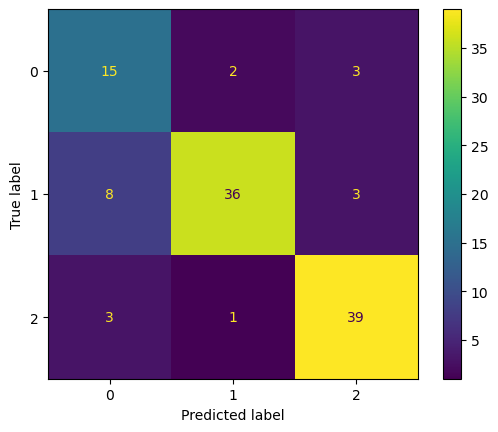

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [144]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.75      0.58      0.65        26
           2       0.77      0.92      0.84        39
           3       0.91      0.87      0.89        45

    accuracy                           0.82       110
   macro avg       0.81      0.79      0.79       110
weighted avg       0.82      0.82      0.81       110

